In [1]:
import re,xlrd, xlsxwriter, os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
PATH = r"C:\Users\wodms\OneDrive\바탕 화면"
os.chdir(PATH)
os.listdir()

['.ipynb_checkpoints',
 '17',
 '18(상)',
 '18(하)',
 'desktop.ini',
 'handson',
 'JetBrains PyCharm Community Edition 2018.2.3 x64.lnk',
 'kaggle',
 'LD_공간과가치_유동인구수.txt',
 'people.csv',
 'people.html',
 'skorea_municipalities_geo_simple.json',
 'starbucks & trash data google map .ipynb',
 'starbucks.html',
 'starbucks2.csv',
 'trash.html',
 'trash_location_finall1.csv',
 'udrims (서울).lnk',
 '새 폴더']

# Starbucks Data Load

In [2]:
import pandas as pd 
starbucks = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\starbucks2.csv', 
                        engine='python', encoding='utf-8')
starbucks = starbucks.reset_index()

In [3]:
starbucks.columns = ['index','s_name', 'lat', 'lot', 'sido_name', 'gu','doro_address','tel']

In [4]:
starbucks2 = starbucks.iloc[:,[1,5]]

In [5]:
starbucks2.head()

,s_name,gu
0,압구정R,강남구
1,수서역R,강남구
2,양재강남빌딩R,강남구
3,선릉동신빌딩R,강남구
4,봉은사로선정릉,강남구


In [6]:
starbucks3 = starbucks2.groupby(['gu']).count()
starbucks3.columns = ['cafe']

In [7]:
starbucks3.head()

,cafe
gu,
강남구,71
강동구,10
강북구,5
강서구,14
관악구,9


# Starbucks Data Google map

In [8]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

geo_path = r'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [9]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = starbucks3['cafe'],
               columns = [starbucks3.index, starbucks3['cafe']],
               fill_color = 'PuRd', 
               key_on = 'feature.id')
map.save(r'starbucks.html')


# Trash Data Load

In [10]:
trash = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\trash_location_finall1.csv', 
                        engine='python', encoding='utf-8')
trash = trash.reset_index()
trash2 = trash.iloc[:,0:2]
trash2.columns = ['gu','trash']
trash3 = trash2.groupby(['gu']).count()

In [11]:
trash3.head()

,trash
gu,
강남구,946
강동구,404
강북구,164
강서구,213
관악구,131


# Trash Data Google map

In [12]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = trash3['trash'],
               columns = [trash3.index, trash3['trash']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map.save('trash.html')

# People Data Load

In [92]:
people0 = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\LD_공간과가치_유동인구수.txt', engine='python', header=None, sep='|', encoding='utf-8')
people0 = people0.reset_index()
people0 = people0.iloc[1:,[1,4,5,6,7,8,9,10,11]]
people0['people'] = people0['level_5']+people0['level_6']+people0['level_7']+people0['level_8']+people0['level_9']+people0['level_10']+people0['level_11']
people0 = people0.groupby(['level_1'])['people'].mean().reset_index()
# people0.to_csv(r'C:\Users\wodms\OneDrive\바탕 화면\people.csv')

In [88]:
people = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\people.csv', 
                        engine='python', index_col=0,sep='\t')
people

,people
gu,
강남구,7475.529810
강동구,4519.882716
강북구,2518.616801
강서구,2221.806591
관악구,4368.951846
광진구,4383.014648
구로구,5728.976922
금천구,5751.071008
노원구,2459.988383


# People Data Google map

In [15]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = people['people'],
               columns = [people.index, people['people']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map.save('people.html')

# People1 data Load

In [100]:
people1 = pd.read_csv(r'C:\Users\wodms\OneDrive\바탕 화면\people1.csv', 
                        engine='python', index_col=0, encoding='utf-8')
people1 = people1.reset_index()
people1.columns = ['gu', 'people1']

In [106]:
people1

,gu,people1
0,강남구,815032.026498
1,강동구,483383.118529
2,강북구,304985.856155
3,강서구,549332.840466
4,관악구,503412.562732
5,광진구,393569.023133
6,구로구,402208.600479
7,금천구,223908.571042
8,노원구,530929.602082
9,도봉구,295367.383733


# People & Starbucks & Trash data merge 

In [16]:
people = people.reset_index()
starbucks3 = starbucks3.reset_index()
trash3 = trash3.reset_index()

In [17]:
a = pd.merge(people, starbucks3)
seoul = pd.merge(a, trash3)
# seoul.to_csv(r'C:\Users\wodms\OneDrive\바탕 화면\seoul.csv')

,gu,people,cafe,trash
0,강남구,7475.529810,71,946
1,강동구,4519.882716,10,404
2,강북구,2518.616801,5,164
3,강서구,2221.806591,14,213
4,관악구,4368.951846,9,131
5,광진구,4383.014648,13,139
6,구로구,5728.976922,10,333
7,금천구,5751.071008,10,104
8,노원구,2459.988383,10,36
9,도봉구,1928.049275,1,158


In [101]:
seoul1 = pd.merge(seoul, people1)
seoul1

,gu,people,cafe,trash,people1
0,강남구,7475.529810,71,946,815032.026498
1,강동구,4519.882716,10,404,483383.118529
2,강북구,2518.616801,5,164,304985.856155
3,강서구,2221.806591,14,213,549332.840466
4,관악구,4368.951846,9,131,503412.562732
5,광진구,4383.014648,13,139,393569.023133
6,구로구,5728.976922,10,333,402208.600479
7,금천구,5751.071008,10,104,223908.571042
8,노원구,2459.988383,10,36,530929.602082
9,도봉구,1928.049275,1,158,295367.383733


# Correlation matrix & plot 

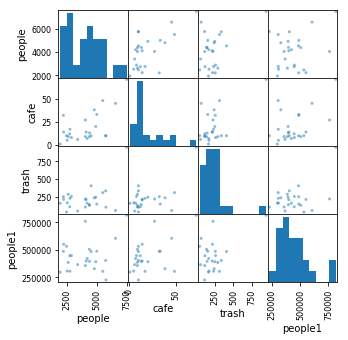

In [104]:
pd.scatter_matrix(seoul1, figsize=(5,5))
plt.show()

In [105]:
seoul1.corr()

,people,cafe,trash,people1
people,1.000000,0.640121,0.443983,0.282457
cafe,0.640121,1.000000,0.605788,0.521680
trash,0.443983,0.605788,1.000000,0.466094
people1,0.282457,0.521680,0.466094,1.000000


# Clustering 1

## 1) using Interia value 

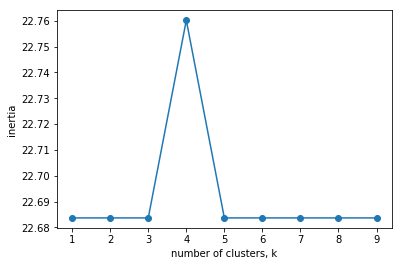

In [70]:
ks = range(1,10)
inertias = []

for k in ks:
    scaler = StandardScaler()
    model = KMeans(n_clusters=3,algorithm='auto')
    pipeline = make_pipeline(scaler,model)
    pipeline.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## 2) data scaling : StandardScaling & k=4 clustering

In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

labels = pd.DataFrame(seoul.gu)
labels.columns=['labels']
feature = seoul[['people','cafe','trash']]

scaler = StandardScaler()
model = KMeans(n_clusters=4,algorithm='auto')
pipeline = make_pipeline(scaler,model)

pipeline.fit(feature)
predict = pd.DataFrame(pipeline.predict(feature))
predict.columns=['predict']

In [72]:
# concatenate labels to df as a new column
r = pd.concat([feature,predict,labels],axis=1)

In [73]:
r

,people,cafe,trash,predict,labels
0,7475.529810,71,946,2,강남구
1,4519.882716,10,404,3,강동구
2,2518.616801,5,164,0,강북구
3,2221.806591,14,213,0,강서구
4,4368.951846,9,131,3,관악구
5,4383.014648,13,139,3,광진구
6,5728.976922,10,333,3,구로구
7,5751.071008,10,104,3,금천구
8,2459.988383,10,36,0,노원구
9,1928.049275,1,158,0,도봉구


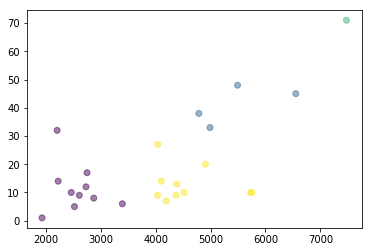

In [74]:
plt.scatter(r['people'],r['cafe'],c=r['predict'],alpha=0.5)

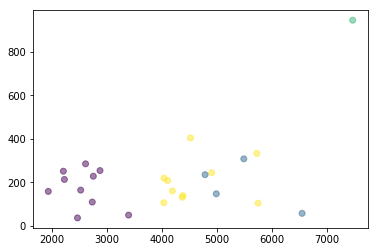

In [75]:
plt.scatter(r['people'],r['trash'],c=r['predict'],alpha=0.5)

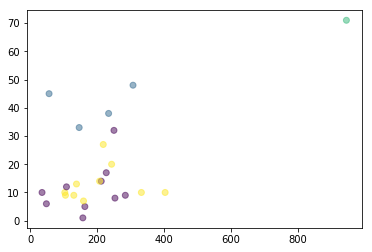

In [76]:
plt.scatter(r['trash'],r['cafe'],c=r['predict'],alpha=0.5)

In [77]:
r[r['predict']==0]

,people,cafe,trash,predict,labels
2,2518.616801,5,164,0,강북구
3,2221.806591,14,213,0,강서구
8,2459.988383,10,36,0,노원구
9,1928.049275,1,158,0,도봉구
10,2607.645607,9,285,0,동대문구
12,2202.409153,32,251,0,마포구
16,2729.478121,12,109,0,성북구
20,2748.654448,17,228,0,용산구
21,2870.580863,8,254,0,은평구
24,3392.070454,6,49,0,중랑구


In [78]:
r[r['predict']==1]

,people,cafe,trash,predict,labels
14,6553.781693,45,57,1,서초구
19,4989.607927,33,147,1,영등포구
22,4785.898808,38,235,1,종로구
23,5491.435925,48,308,1,중구


In [79]:
r[r['predict']==2]

,people,cafe,trash,predict,labels
0,7475.52981,71,946,2,강남구


In [80]:
r[r['predict']==3]

,people,cafe,trash,predict,labels
1,4519.882716,10,404,3,강동구
4,4368.951846,9,131,3,관악구
5,4383.014648,13,139,3,광진구
6,5728.976922,10,333,3,구로구
7,5751.071008,10,104,3,금천구
11,4190.218382,7,160,3,동작구
13,4905.527357,20,244,3,서대문구
15,4033.618413,9,106,3,성동구
17,4036.932691,27,219,3,송파구
18,4102.219298,14,208,3,양천구


# Clustering 2

## 1) using Interia value 

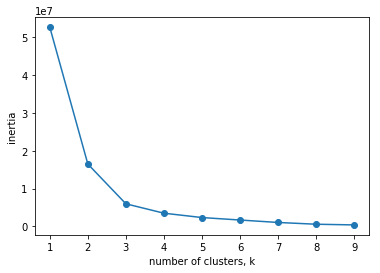

In [82]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(feature)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## 2) k=3 clustering 

In [83]:
labels = pd.DataFrame(seoul.gu)
labels.columns=['labels']
feature = seoul[['people','cafe','trash']]

# create model and prediction
model = KMeans(n_clusters=3,algorithm='auto')
model.fit(feature)

predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']        

# concatenate labels to df as a new column
r = pd.concat([feature,predict,labels],axis=1)

In [84]:
r[r['predict']==1]

,people,cafe,trash,predict,labels
0,7475.529810,71,946,1,강남구
6,5728.976922,10,333,1,구로구
7,5751.071008,10,104,1,금천구
14,6553.781693,45,57,1,서초구
23,5491.435925,48,308,1,중구


In [85]:
r[r['predict']==2]

,people,cafe,trash,predict,labels
1,4519.882716,10,404,2,강동구
4,4368.951846,9,131,2,관악구
5,4383.014648,13,139,2,광진구
11,4190.218382,7,160,2,동작구
13,4905.527357,20,244,2,서대문구
15,4033.618413,9,106,2,성동구
17,4036.932691,27,219,2,송파구
18,4102.219298,14,208,2,양천구
19,4989.607927,33,147,2,영등포구
22,4785.898808,38,235,2,종로구


In [87]:
r[r['predict']==0]

,people,cafe,trash,predict,labels
2,2518.616801,5,164,0,강북구
3,2221.806591,14,213,0,강서구
8,2459.988383,10,36,0,노원구
9,1928.049275,1,158,0,도봉구
10,2607.645607,9,285,0,동대문구
12,2202.409153,32,251,0,마포구
16,2729.478121,12,109,0,성북구
20,2748.654448,17,228,0,용산구
21,2870.580863,8,254,0,은평구
24,3392.070454,6,49,0,중랑구
